In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## About this dataset
This dataset contains insightful information related to insurance claims, giving us an in-depth look into the demographic patterns of those receiving them. The dataset contains information on patient age, gender, BMI (Body Mass Index), blood pressure levels, diabetic status, number of children, smoking status and region. By analyzing these key factors across geographical areas and across different demographics such as age or gender we can gain a greater understanding of who is most likely to receive an insurance claim. This understanding gives us valuable insight that can be used to inform our decision making when considering potential customers for our services. On a broader scale it can inform public policy by allowing for more targeted support for those who are most in need and vulnerable. These kinds of insights are extremely valuable and this dataset provides us with the tools we need to uncover them.

In [190]:
df = pd.read_csv('/content/Insurance Claim Analysis.csv')
df.drop(columns = 'index',inplace=True)
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [191]:
df.shape

(1340, 10)

In [192]:
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [193]:
df.dropna(inplace = True)

In [194]:
df.shape

(1332, 10)

In [195]:
df['claim'].describe()

count     1332.000000
mean     13325.246426
std      12109.620712
min       1121.870000
25%       4760.157500
50%       9412.965000
75%      16781.327500
max      63770.430000
Name: claim, dtype: float64

In [196]:
df.isnull().sum()

PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

# Define Column Types
1. Categorical - gender, diabetic, chilren, smoker, region
2. Numerical - PatientID, age, bmi, bloodpressure, claim


#Featue Engineering

In [197]:
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [198]:
def categorize_age(age):

  try:
    if 18<= age and age <=29:
      return "young"

    elif 30<= age and age <=35:
      return "30's-35's"

    elif 36 <= age and age <=40:
      return "36's-40's"

    elif 41 <=age and age <= 45:
      return "41's-45's"

    elif 46 <=age and age <= 50:
      return "46's-50's"

    elif 51 <= age and age<= 55:
      return "51's-55's"

    elif 56 <=age and age<=60:
      return "56's-60's"

  except Exception as e:
     return "not defined"

categorize_age = df['age'].apply(categorize_age)
df.insert(2,'categorize_age',categorize_age)


In [199]:
def categorize_bmi(bmi):

    if bmi < 18.5:
        return "under-weight"
    elif 18.5 <= bmi < 25:
        return "normal-weight"
    elif 25 <= bmi < 30:
        return "overweight"
    else:
        return "obesity"

categorize_bmi = df['bmi'].apply(categorize_bmi)
df.insert(5,'categorize_bmi',categorize_bmi)


In [200]:
def categorize_bp(value):

    if 80 <= value and value <120:
        return 'Normal'
    elif 120 <= value <= 129:
        return 'Elevated'
    else:
        return 'Hypertension'

categorize_bp = df['bloodpressure'].apply(categorize_bp)
df.insert(7,'categorize_bp',categorize_bp)


In [201]:
lower_q = df['claim'].quantile(0.25)
upper_q = df['claim'].quantile(0.75)


def categorize_claim(claim_amount):
    if claim_amount < lower_q:
        return 'lower'
    elif lower_q <= claim_amount <= upper_q:
        return 'mid'
    else:
        return 'higher'

df['categorize_claim'] = df['claim'].apply(categorize_claim)



In [202]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# Univariate Analaysis on Categorical Columns
### Categorical - gender, diabetic, chilren, smoker, region,categorize_age ,categorize_bmi,categorize_bp,categorize_claim

#1. gender

- Male -> 50.3 % and Female -> 49.7%
- Not a huge gap is shown between male/female population.
- No missing values

In [203]:
temp = df['gender'].value_counts().reset_index().rename(columns={'index':'gender','gender':'population'})
temp

,gender,population
0,male,670
1,female,662


In [204]:
px.pie(temp,values='population',names='gender',hole = 0.5,title='Gender Contribution in Total Population',hover_name = 'gender')

In [205]:
fig = px.bar(temp,x='gender',y='population',color='gender',title='Population vs Gender Analysis',text_auto = True)
fig.update_layout(xaxis = dict(title ='Gender'), yaxis = dict(title ='Population'), bargap = 0.6)
fig.show()

In [206]:
df['gender'].isnull().sum()

0

# 2. diabetic

- Diabetic -> 47.8% Non-Diabetic ->52.2%
- No missing values





In [207]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [208]:
temp = df['diabetic'].value_counts().reset_index().rename(columns ={'index':'diabetic','diabetic':'count'})
temp

,diabetic,count
0,No,695
1,Yes,637


In [209]:
px.pie(temp,values='count',names='diabetic',hole = 0.5,title='Diabetic vs Non-diabetic in Total Population',hover_name = 'diabetic')

In [210]:
fig = px.bar(temp,x='diabetic',y='count',color='diabetic',title='Diabetic vs Non-diabetic Population',text_auto = True)
fig.update_layout(xaxis = dict(title ='Diabetic'), yaxis = dict(title ='Population'), bargap = 0.6)
fig.show()

In [211]:
df['diabetic'].isnull().sum()

0

In [212]:
df.shape

(1332, 14)

In [213]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


#3. children
1. How many chilren
 - 0 -> 42.6%
 - 1 -> 24.3%
 - 2 -> 18.0%
 - 3 -> 11.8%
 - 4 -> 1.88%
 - 5 -> 1.35%
2. No missing values


In [214]:
temp = df['children'].value_counts().reset_index().rename(columns = {'index':'children','children':'count'})
temp

,children,count
0,0,568
1,1,324
2,2,240
3,3,157
4,4,25
5,5,18


In [215]:
fig = px.bar(temp,x='children',y='count',color='children',title='Population Distribution by Number of Children',text_auto = True)
fig.update_layout(xaxis = dict(title =' No. of Children'), yaxis = dict(title ='Count'))
fig.show()

In [216]:
px.pie(temp,values='count',names='children',hole = 0.5,title= 'Distribution of the population based on the number of children they have', hover_name = 'children')


In [217]:
df['children'].isnull().sum()

0

# 4. smoker
- 20.6 % -> Smoker
- 79.4 % -> Non Smoker
- No missing values.


In [218]:
df['smoker'].isnull().sum()

0

In [219]:
temp = df['smoker'].value_counts().reset_index().rename(columns = {'index':'smoker','smoker':'count'})
temp

,smoker,count
0,No,1058
1,Yes,274


In [220]:
fig = px.bar(temp,x='smoker',y='count',color='smoker',title= 'Smoker Population Distribution',text_auto = True)
fig.update_layout(xaxis = dict(title =' smoker'), yaxis = dict(title ='Count'),bargap = 0.6)
fig.show()

In [221]:
px.pie(temp,values='count',names='smoker',hole = 0.5,title='Smoker Population Distribution',hover_name = 'smoker')

#5. region
- The majority of population come from the Southeast, followed by the Northwest, Southwest, and then Northeast.
- No missing values.

In [222]:
temp = df['region'].value_counts().reset_index().rename(columns = {'index':'region','region':'count'})
temp

,region,count
0,southeast,442
1,northwest,345
2,southwest,314
3,northeast,231


In [223]:
fig = px.bar(temp,x='region',y='count',color='region',title= 'Population Distribution by Region',text_auto = True)
fig.update_layout(xaxis = dict(title = 'Region'), yaxis = dict(title ='Count'))
fig.show()


In [224]:
px.pie(temp,values='count',names='region',hole = 0.5,title='Population Distribution by Region',hover_name = 'region')


In [225]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# Univariate Anlaysis on Numerical Columns
### Numerical - age, bmi, bloodpressure, claim


# 1. Age
- min. age -> 18 yr
- mean age -> 38 yr
- max. age -> 60 yr
- Mostly people age is from age 26-49yr
- No skewness
- Bi-modal Distribution
- No outliers
- No missing values

In [226]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [227]:
temp = df['age'].describe()
temp

count    1332.000000
mean       38.086336
std        11.112804
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [228]:
px.histogram(df,x='age',nbins=40,text_auto = True)

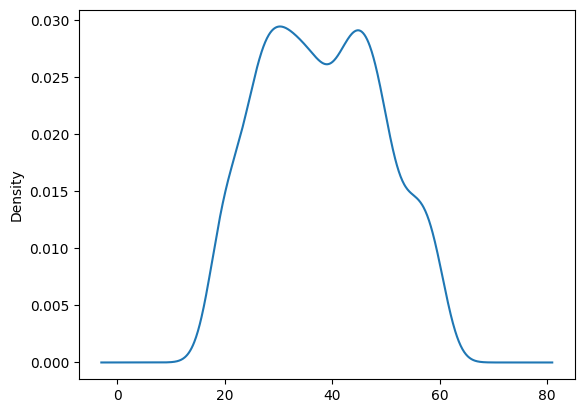

In [229]:
fig = df['age'].plot(kind='kde')
plt.show()

In [230]:
df['age'].skew() # No skewness

0.11172909283724285

In [231]:
fig = px.box(df,x='age',color_discrete_sequence=['green'])
fig.show()

In [232]:
df['age'].isnull().sum()

0

#categorize_age

In [233]:
temp = df['categorize_age'].value_counts().reset_index().rename(columns = {'index':'categorize_age','categorize_age':'count'})
temp


,categorize_age,count
0,young,352
1,30's-35's,234
2,46's-50's,191
3,41's-45's,186
4,36's-40's,177
5,56's-60's,99
6,51's-55's,93


In [234]:
fig = px.pie(temp,values='count',names = 'categorize_age',hover_name = 'categorize_age',hole = 0.5,title ='Population distribution in Age Categories')
fig.show()


In [235]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [236]:
fig = px.histogram(df,x = 'age',text_auto = True,color ='categorize_age')
fig.show()

# 2. bmi
- avg. bmi - 30.65
- min. bmi - 16
- Mostly people have bmi from 25.5 - 33.5
- Normal Distribution
- No skewness
- Outliers are there but they are valid
- No missing values




In [237]:
df['bmi'].describe()

count    1332.000000
mean       30.658333
std         6.118967
min        16.000000
25%        26.200000
50%        30.350000
75%        34.725000
max        53.100000
Name: bmi, dtype: float64

In [238]:
df[df['bmi'] == 16]

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
48,49,34.0,30's-35's,male,16.0,under-weight,83,Normal,No,0,No,northeast,1694.8,lower


In [239]:
df[df['bmi'] == 53.1]

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [240]:
fig = px.histogram(df,x='bmi',nbins=40,text_auto = True)
fig.show()

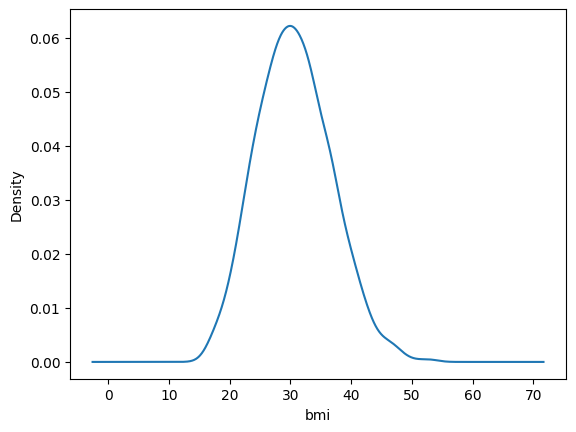

In [241]:
fig = df['bmi'].plot(kind='kde')
plt.xlabel('bmi')
plt.show()

In [242]:
df['bmi'].skew() # No skewness

0.2898954505935464

In [243]:
px.box(df,x='bmi',color_discrete_sequence = ['green'])

In [244]:
df[df['bmi']>=47.7] # Valid outliers

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower
141,142,46.0,46's-50's,male,50.4,obesity,89,Normal,Yes,1,No,southeast,2438.06,lower
675,676,49.0,46's-50's,female,48.1,obesity,81,Normal,Yes,2,No,northeast,9432.93,mid
696,697,49.0,46's-50's,male,47.7,obesity,88,Normal,No,1,No,southeast,9748.91,mid
802,803,42.0,41's-45's,male,49.1,obesity,109,Normal,Yes,0,No,southeast,11381.33,mid
1299,1300,50.0,46's-50's,male,52.6,obesity,110,Normal,No,1,Yes,southeast,44501.40,higher


In [245]:
df['bmi'].isnull().sum()

0

#categorize_bmi
1. 52.7 % are under obsesity
2. 29.1 % are under over-weight
2. 16.7 % are under normal-weight
2. 1.5 % are under under-weight


In [246]:
temp = df['categorize_bmi'].value_counts().sort_values(ascending =False).reset_index().rename(columns = {'index':'category','categorize_bmi':'count'})
temp


,category,count
0,obesity,702
1,overweight,387
2,normal-weight,223
3,under-weight,20


In [247]:
fig = px.pie(temp,values='count',names = 'category',hover_name = 'category',hole = 0.5,title ='Population distribution in BMI Categories')
fig.show()


In [248]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [249]:
fig = px.histogram(df, x = 'bmi',text_auto = True, color='categorize_bmi')
fig.show()

# 3. bloodpressure

- mostly people have bloodpressure 80-101
- outliers are there but they are valid
- postively skewed
- no missing values

In [250]:
df['bloodpressure'].describe()

count    1332.000000
mean       94.189189
std        11.445173
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

In [251]:
px.histogram(df,x='bloodpressure',nbins = 40,text_auto = True)

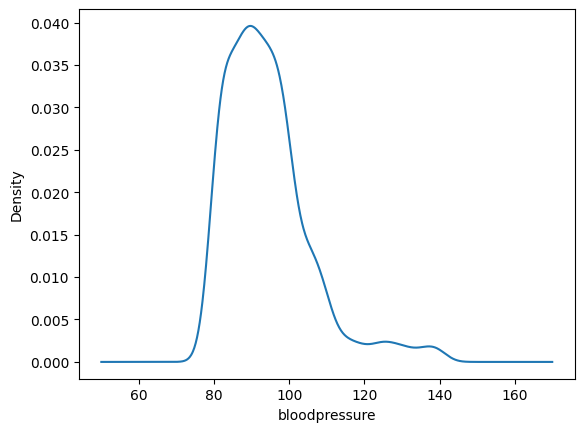

In [252]:
fig = df['bloodpressure'].plot(kind='kde')
plt.xlabel('bloodpressure')
plt.show()

In [253]:
df['bloodpressure'].skew() # postively skewed

1.4838579128667744

In [254]:
px.box(df,x='bloodpressure') # outliers

In [255]:
df[df['bloodpressure']>=119].shape[0] # Valid outliers

62

In [256]:
df['bloodpressure'].isnull().sum()

0

#categorize_bp
- 95.6 % of population is in Normal Blood Pressure Category
- 2.25 % of population is in Elevated Blood Pressure Category
- 2.18 % of population is in Hypertension Blood Pressure Category

In [257]:
temp = df['categorize_bp'].value_counts().reset_index().rename(columns = {'index':'categorize_bp','categorize_bp':'count'})
temp


,categorize_bp,count
0,Normal,1273
1,Elevated,30
2,Hypertension,29


In [258]:
fig = px.pie(temp,values='count',names = 'categorize_bp',hover_name = 'categorize_bp',hole = 0.5,
             title ='Population distribution in Blood Pressure Categories')
fig.show()

In [259]:
fig = px.histogram(df,x='bloodpressure',color='categorize_bp',text_auto = True,title = 'Blood Pressure category distribution')
fig.show()

# 4. claim

- avg. claim : 13325
- Mostly claims are from 0-14k
- Highest claim is from someone of southeast region
 - we also knew that people from southeast region claims the most times
- outliers are there but they are valid
- postively skewed
- No missing values

In [260]:
df['claim'].describe()

count     1332.000000
mean     13325.246426
std      12109.620712
min       1121.870000
25%       4760.157500
50%       9412.965000
75%      16781.327500
max      63770.430000
Name: claim, dtype: float64

In [261]:
df[df['claim'] == 63770.43]
# people from southeast region claims the most times
# Highest claim is from someone of southeast region

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
1339,1340,30.0,30's-35's,female,47.4,obesity,101,Normal,No,0,Yes,southeast,63770.43,higher


In [262]:
df[df['claim'] == 1121.87] # minimum claim is from someone of southeast region

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower


In [263]:
px.histogram(df, x='claim',nbins = 50,text_auto = True)

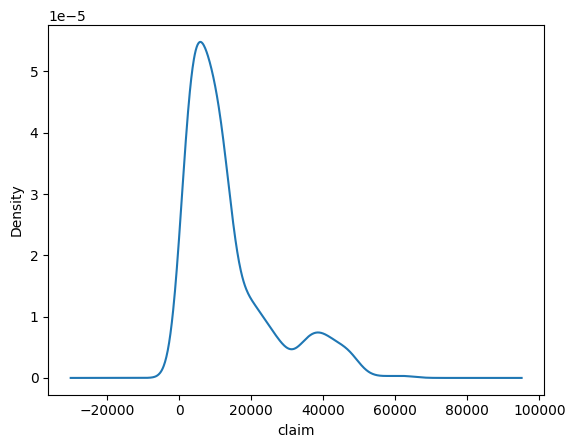

In [264]:
df['claim'].plot(kind='kde')
plt.xlabel('claim')
plt.show()

In [265]:
df['claim'].skew() # postively skewed

1.513847422927789

In [266]:
px.box(df,x='claim') #outliers

In [267]:
df[df['claim']>34600] # outliers but valid

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
1201,1202,45.0,41's-45's,male,33.5,obesity,81,Normal,No,0,Yes,northeast,34617.84,higher
1202,1203,32.0,30's-35's,male,31.7,obesity,125,Elevated,No,0,Yes,southeast,34672.15,higher
1203,1204,26.0,young,male,34.8,obesity,94,Normal,Yes,0,Yes,southwest,34779.62,higher
1204,1205,32.0,30's-35's,male,31.1,obesity,114,Normal,Yes,1,Yes,southeast,34806.47,higher
1205,1206,20.0,young,male,34.9,obesity,124,Elevated,Yes,0,Yes,southwest,34828.65,higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.0,41's-45's,female,35.5,obesity,88,Normal,Yes,0,Yes,northwest,55135.40,higher
1336,1337,59.0,56's-60's,female,38.1,obesity,120,Elevated,No,1,Yes,northeast,58571.07,higher
1337,1338,30.0,30's-35's,male,34.5,obesity,91,Normal,Yes,3,Yes,northwest,60021.40,higher
1338,1339,37.0,36's-40's,male,30.4,obesity,106,Normal,No,0,Yes,southeast,62592.87,higher


In [268]:
df['claim'].isnull().sum()

0

#categorize_claim

In [269]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [270]:
temp = df['categorize_claim'].value_counts().reset_index().rename(columns = {'index':'claim_amount','categorize_claim':'count'})
temp

,claim_amount,count
0,mid,666
1,lower,333
2,higher,333


In [271]:
fig = px.pie(temp,values = 'count',names = 'claim_amount',hole = 0.5, title = 'Claim category distribution')
fig.show()

In [272]:
fig = px.histogram(df,x='claim',color='categorize_claim',text_auto = True)
fig.show()

# Insights from the data

1. We can analyze which region's residents make the highest number of insurance claims and explore the underlying factors contributing to this trend.

 - `Typically, individuals from the south-east region make the highest number of insurance claims(total 5.78 M USD), and they also tend to claim larger amounts as comparsion to the others.`
  - `Out of the total claim amounts 32.6%  amount only goes to south-east region`
 - `Out of the total high claim amounts 33.6% amount only goes to south-east region.`
 -  `Out of the total number of claims 33.2% claims only goes to people of south-east.`

 - ` After south-east, individuals from the north-west region make the highest number of claims(total 4.06 M USD) from insurance companies.`

 - **But why the majority claims are from 'south-east' region of USA ?**
  - `(By Google)`
    - **Healthcare Access and Quality:** The Southeast region, particularly rural areas, may face challenges such as physician shortages, limited access to healthcare facilities, and lower quality of care, which could result in higher rates of illness and consequently more health insurance claims.

    - **Prevalence of Chronic Diseases:** Certain chronic diseases such as obesity, diabetes, heart disease, and hypertension are more prevalent in the Southeast region compared to other parts of the country. Higher rates of chronic diseases can lead to increased healthcare utilization, including more frequent doctor visits, hospitalizations, and prescription medication usage, resulting in higher health insurance claims.

    - **Health Behaviors and Lifestyle Choices:** Differences in health behaviors and lifestyle choices, such as smoking, diet, physical activity, and preventive healthcare practices, can influence the prevalence of chronic diseases and overall health status. The Southeast region may have higher rates of unhealthy behaviors and lower adherence to preventive healthcare recommendations, leading to higher healthcare utilization and more health insurance claims.
<br><br>


2. After Analysing it is found that in Southeast and Northwest Regions, there is a higher proportion of females compared to other regions.

  - `These regions also have the highest number of insurance claims, often for significant amounts.`

  - `Maybe there is a possibility that female population claims the most. Is it ?`

  - `The answer is No`
<br><br>

3. We can analyze whether males or females make the most insurance claims and explore the reasons behind it.

 - `Males apply for insurance amounts more frequently compared to females.`
 - `Of the total claims, 50.3% were made by males, while 49.7% were made by females.`
 - `The difference is not much large`

 - **Why majority of claims are done by males than females?**
  - `(By Google)`
  - **Occupational Hazards:** Males may be overrepresented in certain occupations that carry higher risks of injury or illness, such as construction, mining, or firefighting. This can lead to a higher frequency of health insurance claims for work-related injuries or occupational diseases.

  - **Healthcare Utilization Patterns:** Research suggests that men, on average, may be less likely to seek preventive care and medical attention for minor health issues compared to women. As a result, when men do seek medical care, their conditions may be more advanced or require more extensive treatment, leading to higher claim rates.

  - **Health Risk Factors:** Men tend to have higher rates of certain health risk factors, **such as smoking,** alcohol consumption which can increase their likelihood of developing chronic diseases and requiring medical treatment.

 - **Biological Factors:** Some health conditions, such as cardiovascular disease, may manifest differently in men compared to women, potentially leading to different healthcare utilization patterns and claim rates.
<br><br>

4. We can analyze whether the number of insurance claims depends on age, and which age group mostly makes the most insurance claims and for how much?

 - `Young people aged between (18-29) years claim the most(4.9 M USD ), while those aged between (50-60) years claim the least(2.44 Million USD )`

 Why young people takes most number of claims ?

 `(By Analysing Data)`
 - The significant portion of the young population resides in the Southeast region, which is renowned for its elevated total claim amounts.

 `(By Google)`
  -  **Healthcare Needs:** Young people may have specific healthcare needs such as accidents, injuries, or illnesses that prompt them to make insurance claims.

  - **Risk-Taking Behavior:** Young individuals might engage in riskier behaviors such as driving fast, participating in extreme sports, or other activities that increase the likelihood of accidents, leading to insurance claims.

  - **Health Awareness:** Younger generations might be more health-conscious and proactive in seeking medical attention when needed, resulting in more insurance claims for preventive care or early intervention.

  - **Access to Insurance:** With the Affordable Care Act (ACA), more young adults gained access to health insurance through provisions allowing them to stay on their parents' insurance plans until the age of 26. This expanded coverage could contribute to higher claim rates among young people.

  - **Occupational Hazards:** Some young adults may work in industries or occupations with higher risks of injury, such as construction or hospitality, leading to more insurance claims.

  - **Mental Health Concerns:** Young people may also experience mental health issues such as anxiety and depression, leading to therapy or counseling sessions covered by insurance.
<br><br>

5. We can analyze whether diabetics or non-diabetics make the most insurance claims and **explore the reasons behind it.**

 - `49.29 % of male are diabetic and 50.7 % of females are diabetic.`

 - `Individuals without diabetes claim a higher total amount of insurance(9.31 M USD) compared to individuals with diabetes, who claim 8.43 M USD`

 - `(By Analysing Data)`
 - **Reason**
    -  Given that non-diabetic individuals claim the most compared to others, it's notable that within the non-diabetic category, the highest claim rates are among the **young demographic**. This aligns with our previous findings indicating that younger individuals tend to make the highest number of insurance claims. Additionally, it's worth noting that a significant portion of the young population resides in the Southeast region, which is renowned for its elevated total claim amounts.
<br>
5. Is there any correlation between blood pressure levels and diabetes and claims?
  - `There is a no realtionship that people who are diabetic also have Elevated or High blood-pressure levels.`
  - `normal blood pressure + non-diabetic : claims -> (8.09 M USD)`
  - `normal blood pressure + diabetic : claims -> (7.04 M USD)`
  - `then comes the rest`
<br><br>

6. Does the insurance claim amount depend on the number of children individuals have?

 - `Generally, individuals with no children claim the highest amount (7.1 million USD), then`
 - `1 child (4.12 M USD)`
 - `2 children (3.61 M USD)`
 - `3 children (2.14 M USD)`
 - `4 children (346.26k USD)`
 - `5 children (158.14k USD)`

  **What factors contribute to this relationship?**
  - `(By Analysing Data)`
  -The majority of individuals with 0, 1, 2, or 3 children are from the Southeast region, where claim rates are known to be highest

  - `(By Google)`
  - **Healthcare Needs and Utilization:** Individuals or couples without children may have higher healthcare needs and utilization due to factors such as aging, pre-existing health conditions, or lifestyle choices. They may be more likely to seek medical care and treatment for themselves, leading to higher health insurance claims.
  - **Age and Health Status:** As mentioned earlier, individuals without children may be older on average, and older age is associated with higher healthcare needs and utilization. Older individuals are more likely to have chronic health conditions and require medical treatment, resulting in higher healthcare costs.  
<br>

7. We can analyze whether smokers or non-smokers make the most insurance claims and investigate the reasons behind it.

 - `More Male smoker population(58.03%) as comparsion to Female smoker(41.97%).`

 - `The total amount claimed by non-smokers(8.96 M USD) is generally greater than that claimed by smokers(8.78 M USD).`

 - `The amount gap is not of concern as there is no such huge gap.`

- `Specifically:`
  - `We can conclude that Male non-smokers and Female smokers claim the lowest.`
  - `Male smokers claim the highest amount, totaling 5.25 million USD`
  - `Female smokers claim the lowest amount, totaling 3.52 million USD`
  - `Male non-smokers follow, with a total claim amount of 4.17 million USD`
  - `Female non-smokers come next, with a total claim amount of 4.8 million USD`
<br><br>


9. We can analyze is there any relationship b/w individuals with higher BMI and insurance claims.

 - `In terms of insurance claims, individuals classified as obese present the highest total, amounting to 11M USD.`
 - `Overweight individuals : 4.28M USD.`
 - `Normal-weight individuals : 2.3M USD.`
 - `Underweight individuals : 177k USD.`

10. What are the reasons that why individuals with higher BMI make the most insurance claims?

   - `(It is strange but after Analysing Data)`
    - **Normal Blood Pressure :** In cases of obesity and overweight, the majority of individuals fall under the Normal blood pressure category, which also coincides with our observation that individuals in the **normal blood pressure category tend to make the most claims.**

    - **Non-Diabetic :** In cases of obesity and overweight, the majority of individuals fall under the Non-Diabetic Category, which also coincides with our observation that individuals with **no Diabetes tend to make the most claims.**

    - **Young Individuals :** In cases of obesity and overweight, the majority of individuals fall under the Young Category, which also coincides with our observation that **young individuals tend to make the most claims.**

    - **Non-Smoker :** In cases of obesity and overweight, the majority of individuals fall under the Non Smoking Category, which also coincides with our observation that **non-smokers tend to make the most claims.**
<br><br>

9. Is there a correlation between blood pressure levels and insurance claims?

 - `Generally, individuals with normal blood pressure (less than 120) tend to make more number of insurance claims (23x) as compared to those with high blood pressure.`
 - `Out of the total number of insurance claims 95.6% goes to people with normal blood pressure.`
 - `Insurance claims totaling 15.5 M USD are paid to individuals with normal blood pressure.`
 - ` Combined Insurance claims totaling 2.23 M USD are paid to individuals with elevate and high blood pressure.`
 - `However, despite the higher frequency of claims from individuals with normal blood pressure, the individual insurance amount claimed by a single person in the high or elevated blood pressure category is greater than that claimed by a single person in the normal blood pressure category.`
 <br><br>






# Bivariate Analysis

# 1. gender and diabetic
- More Females have diabetes than Males
- 50.7 % of females are diabetic whil 49.29 % of male are diabetic

In [273]:
temp = (pd.crosstab(df['diabetic'],df['gender'],normalize='index')*100).round(2)
temp

gender,female,male
diabetic,,
No,48.78,51.22
Yes,50.71,49.29


In [274]:
temp = pd.crosstab(df['diabetic'],df['gender'])
temp

gender,female,male
diabetic,,
No,339,356
Yes,323,314


In [275]:
fig = px.bar(temp,x=temp.index,y=temp.columns,text_auto = True,title ='Diabetic population vs gender',barmode='stack')
fig.update_layout(bargap=0.5)


# 2. gender and smoker
- More Male smoker are as comparsion to Female
- Male smoker : 58.03 %
- Female smoker : 41.97%

In [276]:
temp = (pd.crosstab(df['smoker'],df['gender'],normalize = 'index')*100).round(2)
temp

gender,female,male
smoker,,
No,51.70,48.30
Yes,41.97,58.03


In [277]:
fig = px.bar(temp,x=temp.index,y=temp.columns,text_auto = True,title ='Smoker population vs gender',barmode='stack')
fig.update_layout(bargap=0.5)

# 3. gender and region

- southeast and southwest regions have more female as comparsion to other
- Southeast is also the region where the people claims the most and also in high amounts
- Maybe there is a possibility that female claims the most. Is it ?
- The answer is No

In [278]:
temp = (pd.crosstab(df['gender'],df['region'],normalize = 'columns')*100).round(2)
temp

region,northeast,northwest,southeast,southwest
gender,,,,
female,48.48,47.54,50.68,51.59
male,51.52,52.46,49.32,48.41


# 4. region and claim
- Out of the total claim amounts 32.6%  amount only goes to south-east region.
- Out of the total high claim amounts 33.6% amount only goes to south-east region.
- Out of the total number of claims 33.2% claims only goes to people of south-east.


In [279]:
temp = df.groupby('region')['claim'].sum().sort_values(ascending = False).reset_index().rename(columns={'claim':'claim_amount'})
temp # claim amount vs region

,region,claim_amount
0,southeast,5783789.60
1,northwest,4069006.54
2,southwest,3995062.77
3,northeast,3901369.33


In [280]:
px.pie(temp, values= 'claim_amount',names='region',hover_name = 'region',hole = 0.5,title =' Region Contribution in Total Claim Amount')


In [281]:
px.bar(temp,x='region',y='claim_amount',text_auto = True,color='region',title ='Claim Amount vs Region')

In [282]:
temp = df.groupby('region')['claim'].count().reset_index().rename(columns={'claim':'count'})
temp # number of claims did by people

,region,count
0,northeast,231
1,northwest,345
2,southeast,442
3,southwest,314


In [283]:
px.pie(temp, values='count',names='region',hover_name = 'region',hole = 0.5,title ='Region Contribution in Total Number of claims')


In [284]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [285]:
temp = df[df['categorize_claim'] == 'higher']['region'].value_counts().reset_index().rename(columns = {'index':'region','region':'claim_count'})
temp


,region,claim_count
0,southeast,112
1,northeast,80
2,northwest,74
3,southwest,67


In [286]:
px.pie(temp, values='claim_count',names='region',hover_name = 'region',hole = 0.5,title ='Region contribution in Higher Claim Amounts')

# Out of the total higher claim amounts 33.6% goes to south-east region

In [287]:
px.scatter(df,y='region',x='claim',color='region',hover_name = 'claim',title='Number of Claims Over Different Regions')

In [288]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# 5. gender and claim

- Males apply for insurance amounts more frequently compared to females.
- Of the total claims, 50.3% were made by males, while 49.7% were made by females.
- No high differences.

In [289]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [290]:
temp = df.groupby('gender')['claim'].count().reset_index().rename(columns={'claim':'claim_count'})
temp


,gender,claim_count
0,female,662
1,male,670


In [291]:
px.pie(temp, values='claim_count',names='gender',hover_name = 'gender',hole = 0.5,title='Claim Distribution over Gender')


In [292]:

px.box(df, y= 'claim',color='gender')

# 6. bloodpressure and claim

- Generally, individuals with normal blood pressure (less than 120) tend to make more number of insurance claims (23x) as compared to those with high blood pressure.

  - Out of the total number of insurance claims 95.6% goes to people with normal blood pressure.
 - Insurance claims totaling 15.5 M USD are paid to individuals with normal blood pressure.
 - Combined Insurance claims totaling 2.24 M USD are paid to individuals within category of elevated and hypertension blood pressure levels.

- However, despite the higher frequency of claims from individuals with normal blood pressure, the individual insurance amount claimed by a single person in the high blood pressure category is greater than that claimed by a single person in the normal blood pressure category.

In [293]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [294]:
temp = df.groupby('categorize_bp')['claim'].count().reset_index().rename(columns={'claim':'count'})
temp

,categorize_bp,count
0,Elevated,30
1,Hypertension,29
2,Normal,1273


In [295]:
px.pie(temp,values='count',labels ='categorize_bp',hover_name = 'categorize_bp',title = 'Claim Amount Distribution over Blood pressur Category')


In [296]:
temp = df.groupby('categorize_bp')['claim'].sum().reset_index().rename(columns={'claim':'claim_amount'})
temp

,categorize_bp,claim_amount
0,Elevated,1164319.68
1,Hypertension,1079680.50
2,Normal,15505228.06


In [297]:
px.bar(temp,y = 'claim_amount',x ='categorize_bp',color='categorize_bp',text_auto = True,title = 'Claim Amount Distribution over Blood Pressure Category')


In [298]:
px.scatter(df, x='claim',y = 'bloodpressure',color='categorize_bp',hover_name = 'claim',title ='Blood Pressure Category vs Claim Amount')

# However, despite the higher frequency of claims from individuals with normal blood pressure,
# the individual insurance amount claimed by a single person in the hypertension or elevate blood pressure category is
# greater than that claimed by a single person in the normal blood pressure category


# 7. smoker and claim

- The total amount claimed by non-smokers(8.96 M USD) is generally greater than that claimed by smokers(8.78 M USD).


In [299]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [300]:
temp= df.groupby('smoker')['claim'].sum().reset_index().rename(columns={'claim':'claim_amount'})
temp

,smoker,claim_amount
0,No,8967464.68
1,Yes,8781763.56


In [301]:
fig = px.bar(temp, x ='smoker',y='claim_amount',title ='Claim Amount Vs Smoker' ,text_auto = True,color='smoker')
fig.update_layout(bargap = 0.5)
fig.show()

# 8. smoker, gender, claim
  - Male smokers claim the highest amount, totaling **5.25 million USD.**
  - Female smokers claim the lowest amount, totaling **3.52 million USD.**
  - Male non-smokers follow, with a total claim amount of **4.17 million USD.**
  - Female non-smokers come next, with a total claim amount of **4.8 million USD.**

  - `From this we can conclude that Male non-smoker and Female smoker claim the lowest.`

In [302]:
temp= df.groupby(['smoker','gender'])['claim'].sum().sort_values(ascending = False).reset_index()
temp


,smoker,gender,claim
0,Yes,male,5253678.99
1,No,female,4792976.66
2,No,male,4174488.02
3,Yes,female,3528084.57


# 9. diabetic and claim
- Individuals without diabetes claim a higher total amount of insurance, totaling 9.31 million USD, compared to individuals with diabetes, who claim 8.43 million USD

In [303]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [304]:
temp = df.groupby('diabetic')['claim'].sum().reset_index()
temp

,diabetic,claim
0,No,9317588.51
1,Yes,8431639.73


In [305]:
fig = px.bar(temp , y = 'claim' ,x= 'diabetic',text_auto = True,title = 'Claim Amount Vs Diabetic',color='diabetic')
fig.update_layout(bargap = 0.5)
fig.show()


In [306]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# 10. diabetic ,bloodpressure,claim
- There is a no realtionship that people who are diabetic also have Elevated or High blood-pressure levels.
- normal blood pressure + non-diabetic claims -> (8.09 M USD) -> **Highest**
- normal blood pressure + diabetic claims -> (7.04 M USD)


In [307]:
temp = df.groupby(['diabetic','categorize_bp'])['claim'].count().sort_values(ascending = False).reset_index().rename(columns={'claim':'count'})
temp
# There is a no realtionship that people who have diabetic also have Elevated or High blood-pressure.


,diabetic,categorize_bp,count
0,No,Normal,664
1,Yes,Normal,609
2,No,Elevated,17
3,Yes,Hypertension,15
4,No,Hypertension,14
5,Yes,Elevated,13


In [308]:
temp = df.groupby(['diabetic','categorize_bp'])['claim'].sum().sort_values(ascending = False).reset_index()
temp

# people having normal blood pressure and no diabetic claims the most (8.09 M USD) then
# comes people having normal blood pressure and but diabetic claims the (7.04 M USD)


,diabetic,categorize_bp,claim
0,No,Normal,8096685.17
1,Yes,Normal,7408542.89
2,No,Elevated,710210.83
3,Yes,Hypertension,568987.99
4,No,Hypertension,510692.51
5,Yes,Elevated,454108.85


# 11. children and claim
- Generally, individuals with no children claim the highest amount (7.1 million USD), then
- 1 child (4.12 M USD)
- 2 children (3.61 M USD)
- 3 children (2.14 M USD)
- 4 children (346.26k USD)
- 5 children (158.14k USD)


In [309]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [310]:
temp = df.groupby('children')['claim'].sum().sort_values(ascending = False).reset_index().round(2)
temp

,children,claim
0,0,7091473.14
1,1,4124899.67
2,2,3617655.36
3,3,2410785.01
4,4,346266.42
5,5,158148.64


In [311]:
fig = px.bar(temp, x='children', y='claim', title='Claim Amount vs. Number of Children',text_auto = True,color='children')
fig.update_layout(bargap = 0.2)
fig.show()


In [312]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# 12. children and region
- The majority of individuals with 0, 1, 2, or 3 children are from the Southeast region, where claim rates are known to be highest.

In [313]:
temp = (pd.crosstab(df['children'],df['region'],normalize = 'index')*100).round(2)
temp

region,northeast,northwest,southeast,southwest
children,,,,
0,18.49,26.41,32.57,22.54
1,17.59,23.46,35.19,23.77
2,15.42,27.50,33.33,23.75
3,15.92,29.30,31.21,23.57
4,24.00,24.00,24.00,28.00
5,5.56,5.56,44.44,44.44


In [314]:
fig = px.imshow(temp,color_continuous_scale='Viridis',text_auto = True)
fig.update_layout(xaxis = dict(title = 'region'),
                  yaxis = dict(title = 'chilren'))
fig.show()


In [315]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# 13. age and calim
- Young people that aged between 18 and 29 years claim the most(4.9 Million USD ), while those aged between 51-60 years claim the least(2.44 Million USD )

In [316]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [317]:
temp = df.groupby('categorize_age')['claim'].sum().sort_values(ascending = False).reset_index()
temp


,categorize_age,claim
0,young,4910592.33
1,30's-35's,2937597.46
2,41's-45's,2534403.69
3,36's-40's,2499777.04
4,46's-50's,2419825.18
5,56's-60's,1305059.30
6,51's-55's,1141973.24


In [318]:
px.scatter(df,x='age',y='claim',title=' Claim Distribution over Age',facet_col = 'categorize_age')


In [319]:
px.scatter(df,x='age',y='claim',title=' Claim Distribution over Age',color = 'categorize_age')


In [320]:
fig = px.bar(temp,x='categorize_age', y='claim',text_auto = True,title ='Claim Distribution over Age',color='categorize_age')
fig.show()


# 14. bmi and claim
- In terms of insurance claims, individuals classified as obese present the highest total, amounting to 10.98 million USD.
- Overweight individuals : 4.27 million USD.
- Normal-weight individuals : 2.3 million USD.
- Underweight individuals : 177k USD.

In [321]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


In [322]:
temp = df.groupby('categorize_bmi')['claim'].sum().sort_values(ascending = False).reset_index().rename(columns={'categorize_bmi':'category'})
temp


,category,claim
0,obesity,10989706.19
1,overweight,4276524.50
2,normal-weight,2305953.52
3,under-weight,177044.03


In [323]:
fig = px.bar(temp,x='category', y='claim',text_auto = True,title ='Claim Amount vs BMI Classification',color='category')
fig.update_layout(bargap = 0.2)
fig.show()


In [324]:
px.scatter(df,x='bmi',y='claim',title=' Claim Amount vs BMI', color='categorize_bmi',hover_name ='claim')


In [325]:
px.scatter(df,x='bmi',y='claim',title=' Claim Amount Count vs BMI',facet_col= 'categorize_bmi',hover_name ='claim')


In [326]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


# 15. bmi or bloodpressure

- In cases of obesity and overweight, the majority of individuals fall under the Normal blood pressure category, which coincides with the observation that individuals in the Normal blood pressure category tend to make the most claims

In [327]:
temp = (pd.crosstab(df['categorize_bmi'],df['categorize_bp'],normalize = 'index')*100).round(2)
temp


categorize_bp,Elevated,Hypertension,Normal
categorize_bmi,,,
normal-weight,0.45,0.90,98.65
obesity,3.99,3.28,92.74
overweight,0.26,1.03,98.71
under-weight,0.00,0.00,100.00


# 16. bmi and diabetic
- In cases of obesity and overweight, the majority of individuals fall under the Non-Diabetic Category, which coincides with the observation that individuals with No Diabetes tend to make the most claims

In [328]:
temp = pd.crosstab(df['categorize_bmi'],df['diabetic'],normalize = 'index')*100
temp

diabetic,No,Yes
categorize_bmi,,
normal-weight,47.085202,52.914798
obesity,53.418803,46.581197
overweight,52.971576,47.028424
under-weight,50.000000,50.000000


In [329]:
df.groupby(['categorize_bmi','diabetic'])['claim'].sum().sort_values(ascending = False).reset_index()


,categorize_bmi,diabetic,claim
0,obesity,No,5875150.29
1,obesity,Yes,5114555.90
2,overweight,No,2293846.40
3,overweight,Yes,1982678.10
4,normal-weight,Yes,1239039.87
5,normal-weight,No,1066913.65
6,under-weight,Yes,95365.86
7,under-weight,No,81678.17


# 17. bmi and age

- In cases of obesity and overweight, the majority of individuals fall under the Young Category, which also coincides with our observation that young individuals tend to make the most claims.

In [330]:
pd.crosstab(df['categorize_bmi'],df['categorize_age'],normalize = 'index')*100


categorize_age,30's-35's,36's-40's,41's-45's,46's-50's,51's-55's,56's-60's,young
categorize_bmi,,,,,,,
normal-weight,17.488789,13.004484,16.591928,11.210762,4.932735,9.865471,26.905830
obesity,16.809117,12.820513,13.247863,14.387464,6.125356,7.264957,29.344729
overweight,17.571059,14.470284,13.953488,16.279070,9.819121,6.201550,21.705426
under-weight,45.000000,10.000000,10.000000,10.000000,5.000000,10.000000,10.000000


# 18. bmi and smoker
- In cases of obesity and overweight, the majority of individuals fall under the Non Smoking Category, which also coincides with our observation that Non-smokers tend to make the most claims.

In [331]:
temp = pd.crosstab(df['categorize_bmi'],df['smoker'],normalize = 'index')*100
temp

smoker,No,Yes
categorize_bmi,,
normal-weight,77.578475,22.421525
obesity,79.344729,20.655271
overweight,80.878553,19.121447
under-weight,75.000000,25.000000


# 19. diabetic and age and region
- Given that non-diabetic individuals claim the most compared to others, it's notable that within the non-diabetic category, the highest claim rates are among the young demographic. This aligns with our previous findings indicating that younger individuals tend to make the highest number of insurance claims. Additionally, it's worth noting that a significant portion of the young population resides in the Southeast region, which is renowned for its elevated total claim amounts.

In [332]:
temp = df.groupby(['categorize_age','diabetic','region'])['claim'].count().sort_values(ascending = False).reset_index().rename(columns ={'claim':'count'})
temp.head()


,categorize_age,diabetic,region,count
0,young,No,southeast,58
1,young,Yes,southeast,50
2,young,No,southwest,48
3,young,Yes,northwest,46
4,young,No,northwest,44


In [333]:
px.bar(temp, x= 'diabetic',y='count',color='categorize_age',facet_col ='region',title='Diabetic vs Number of Claims based on age over different region')

In [334]:
df.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
0,1,39.0,36's-40's,male,23.2,normal-weight,91,Normal,Yes,0,No,southeast,1121.87,lower
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
9,10,30.0,30's-35's,male,53.1,obesity,97,Normal,No,0,No,northwest,1163.46,lower


#Within the group of young claimants, how does the number of claims vary between males and females ?

# 20. gender and age

- We have a significantly higher proportion of young males, at a ratio of 2.38 times compared to young females. Additionally, upon further analysis, we've discovered that young individuals make the most claims, and among them, males submit the highest number of claims.

In [335]:
temp = pd.crosstab(df['gender'],df['categorize_age'])
temp

categorize_age,30's-35's,36's-40's,41's-45's,46's-50's,51's-55's,56's-60's,young
gender,,,,,,,
female,109,75,96,86,93,99,104
male,125,102,90,105,0,0,248


In [336]:
248/104

2.3846153846153846

In [337]:
temp = df[df['categorize_age'] == 'young']
temp.head()

,PatientID,age,categorize_age,gender,bmi,categorize_bmi,bloodpressure,categorize_bp,diabetic,children,smoker,region,claim,categorize_claim
1,2,24.0,young,male,30.1,obesity,87,Normal,No,0,No,southeast,1131.51,lower
7,8,19.0,young,male,41.1,obesity,100,Normal,No,0,No,northwest,1146.80,lower
8,9,20.0,young,male,43.0,obesity,86,Normal,No,0,No,northwest,1149.40,lower
12,13,19.0,young,male,20.7,normal-weight,81,Normal,No,0,No,northwest,1242.82,lower
22,23,18.0,young,male,35.5,obesity,100,Normal,Yes,0,No,southeast,1532.47,lower


In [338]:
px.scatter(temp,x='age',y='claim',color='gender',title = 'Claim distribution among Young individuals by gender')

#21. age and bp
- We've noted a significantly higher proportion of young individuals with normal blood pressure. Furthermore, upon closer examination of the data, we've found that among individuals with normal blood pressure, those who are young make the most claims.

In [339]:
temp = pd.crosstab(df['categorize_age'],df['categorize_bp'])
temp

categorize_bp,Elevated,Hypertension,Normal
categorize_age,,,
30's-35's,2,6,226
36's-40's,4,3,170
41's-45's,6,4,176
46's-50's,4,6,181
51's-55's,2,2,89
56's-60's,2,1,96
young,10,7,335
